# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [1]:
# Your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("../PS_20174392719_1491204439457_log.csv")
print(df.shape)
df.head()

(6362620, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.isna().sum()

# there are no missing values

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [4]:
df.dtypes

# According to documentation, step is a measure of time.
# There are 3 categorical variables: type has a limited number of values and may
# be one-hot encoded, the other two can be dropped.

# isFraud will be the target, isFlaggedFraud are target predictions from another model

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [5]:
df.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


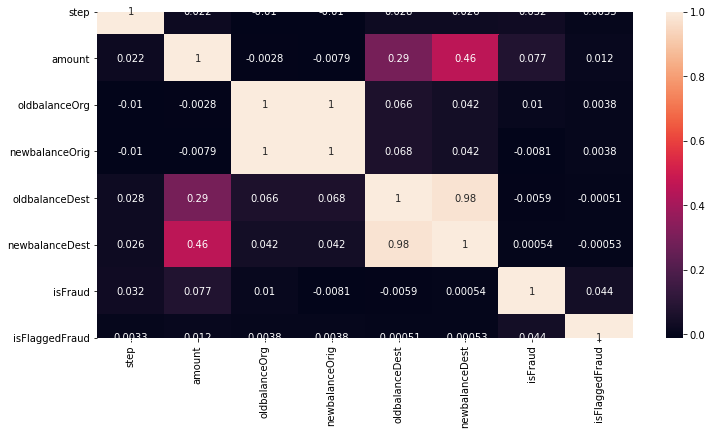

In [7]:
fig = plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)

In [8]:
# The most important feature in predicting the outcome (isFraud) should be
# (type) but also (step, amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest).
# The high correlation between (oldbalanceOrg, newbalanceOrig) and (oldbalanceDest, newbalanceDest)
# should possibly be addressed, by dropping one feature from each pair.

In [9]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

y = df["isFraud"]
x = pd.concat([df.drop(["isFlaggedFraud", "isFraud", "type", "nameOrig", "nameDest"], axis=1), pd.get_dummies(df["type"])], axis=1)

rfe_selector = RFE(estimator=LinearRegression(), n_features_to_select=5)
rfe_selector.fit(x, y)
rfe_support = rfe_selector.get_support()
rfe_feature = x.loc[:,rfe_support].columns.tolist()
print(len(rfe_feature), 'features selected:\n', rfe_feature)

5 features selected:
 ['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER']


In [10]:
# RFE  confirms "type" as the most important feature to predict the outcome.

### What is the distribution of the outcome? 

In [11]:
# Your response here
df["isFraud"].value_counts() / df.shape[0] * 100

# Outcome is binary - Bernoulli/binomial distribution
# Observations are not evenly distributed among the two possible values
# 99.87 of the results are concentrated on outcome 0

0    99.870918
1     0.129082
Name: isFraud, dtype: float64

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [12]:
# Your code here
df.drop(["nameOrig", "nameDest"], axis=1, inplace=True)

In [13]:
encodedtype = pd.get_dummies(df["type"])
df = pd.concat([df,encodedtype], axis=1)
df.drop("type", axis=1, inplace=True)
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,0,0,1,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,0,0,1,0
2,1,181.00,181.00,0.00,0.00,0.00,1,0,0,0,0,0,1
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,0,1,0,0,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0,0,1,0,0,0
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,0,0,0,0,1
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,0,1,0,0,0
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,0,0,0,0,1


In [14]:
# I see no issue with the encoding of step. It acts as a timestamp.
# Actual dates would add no relevant information to the simulation.

### Run a logistic regression classifier and evaluate its accuracy.

In [15]:
# taking a sample to make it easier on the computer...
df_sample = df.sample(n=100000)

In [16]:
df_sample["isFraud"].unique()

array([0, 1])

In [17]:
# Your code here
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x = df_sample.drop(["isFraud", "isFlaggedFraud"], axis=1)
y = df_sample["isFraud"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=45)
model = LogisticRegression().fit(x_train, y_train)
model.score(x_test, y_test)

0.99945

### Now pick a model of your choice and evaluate its accuracy.

In [18]:
# Your code here
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier().fit(x_train, y_train)
model_knn.score(x_test, y_test)

0.99925

### Which model worked better and how do you know?

In [19]:
# Your response here
from sklearn.model_selection import cross_val_score

cv_results = cross_val_score(model, x, y, cv=5)
print(cv_results, "\n", np.mean(cv_results))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[0.9997  0.99995 0.99965 0.9995  0.99955] 
 0.9996700000000001


In [20]:
cv_results_knn = cross_val_score(model_knn, x, y, cv=5) 
print(cv_results_knn, "\n", np.mean(cv_results_knn))

[0.9993  0.99925 0.99935 0.99915 0.9995 ] 
 0.99931


In [21]:
if cv_results.mean() > cv_results_knn.mean():
    print("Logistic regression worked better")
else: print("KNN worked better")

Logistic regression worked better


In [22]:
# All accuracy scores are high because of the inbalance in the data. 99.87% of the observations
# concern non-fraudulent exchanges. Given this data, a model that always predicts "no fraud" will
# still have an accuracy above 99%. To properly train the model and have a better representation
# of its accuracy in predicting frauds, I would need more observations of fraudulent exchanges,
# in equal proportion to the non-fraudulent ones.

# Other solutions:
# - Change the performance metric to precision, recall or F1. Also study the confusion matrix
# - Change the algorithm to a Decision Tree, which is more tolerant of inbalanced data
# - Oversample the minority data: create copies of the cases of fraud until they are proportional to non-frauds
# - Undersample the majority data: analyse only a subset of the non-fraud cases
# - Generate synthetic samples of fraud (for example with imblearn's SMOTE)

Confusion matrix, without normalization
[[19965     5]
 [    6    24]]
Normalized confusion matrix
[[9.99749624e-01 2.50375563e-04]
 [2.00000000e-01 8.00000000e-01]]


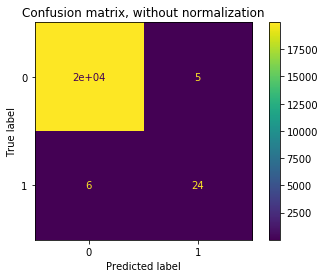

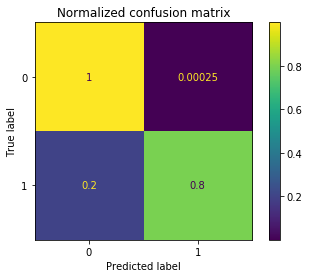

In [24]:
from sklearn.metrics import plot_confusion_matrix

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, x_test, y_test, normalize=normalize)
    disp.ax_.set_title(title)
    
    print(title)
    print(disp.confusion_matrix)

plt.show()